In [1]:
import pickle
import seaborn as sns
import pandas as pd

In [2]:
model_pkl = open(r"..\resources\pickled\SVC_author_classifier_neu.pkl", 'rb')
model = pickle.load(model_pkl)
model_pkl.close()

transformer_count_pkl = open(r"..\resources\pickled\count_transformer_neu.pkl", "rb")
count_transformer = pickle.load(transformer_count_pkl)
transformer_count_pkl.close()

transformer_tfidf_pkl = open(r"..\resources\pickled\tfidf_transformer_neu.pkl", "rb")
tfidf_transformer = pickle.load(transformer_tfidf_pkl)
transformer_tfidf_pkl.close()

In [22]:
new_text = r"In der vergangenen Woche hat ein 25-jähriger Mann mit Falschgeld ein Schmuckstück erworben, um dieses anschließend weiterzuverkaufen. Hierbei hatte er die Rechnung jedoch ohne die 34-jährige Geschädigte sowie die Kriminalpolizei gemacht. Am Montag, den 15. Juli 2019 verkaufte die 34-Jährige über eine Internetplattform einen Platinring der Marke Tiffany für 6.000 Euro in bar an einen unbekannten Mann. Als dieser mitsamt dem Schmuckstück bereits von dannen gezogen war, musste sie feststellen, dass sie Falschgeld in den Händen hielt. Sofort erstattete sie bei der Polizei Anzeige. Zwei Tage später wurde ihr Ring auf derselben Plattform zum Verkauf angeboten. Statt einer ordentlichen Summe echtes Geld, erwartete den Anbieter des Ringes ein Besuch der Kriminalpolizei; mitsamt Festnahme. Die Beamten der Frankfurter Kriminalpolizei stellten mit der Unterstützung der Kollegen der RKI Bad Homburg nicht nur den Ring sicher. Im Zuge einer Wohnungsdurchsuchung wurden zudem unter anderem Pakete mit Testosteron sowie weitere Falsifikate (Falschgeld) aufgefunden und beschlagnahmt. Der 25-Jährige wurde dem Haftrichter vorgeführt und befindet sich nun in Untersuchungshaft. Die Ermittlungen dauern an."
new_text_transf = tfidf_transformer.transform(count_transformer.transform([new_text]))

In [23]:
probas = model.predict_proba(new_text_transf)[0]

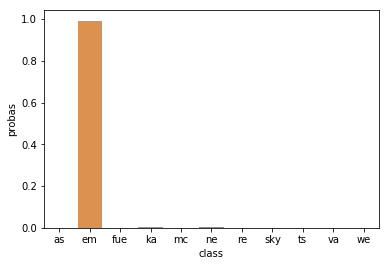

In [24]:
plotdata = pd.DataFrame()
plotdata["class"] = model.classes_
plotdata["probas"] = probas

sns.barplot(x="class", y="probas", data=plotdata)